# Stava Kings and Queens

The structure of this blog is as follows.<br>
Review of women's versus men's records<br>
Comparison with Strava QOMs versus KOMs. Probably best to take average of top 10<br>


In [3]:
%matplotlib inline
import stravalib
import Strava_Download
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import warnings

try:
    f = open( 'mytoken.txt', 'r' )
    mytoken = f.read()
    f.close()
    client = stravalib.Client(access_token = mytoken) 
except:
    print('access_token required')


In [97]:
strava_id=1905161       # Michal Kwiatkowski
athlete = client.get_athlete(strava_id)
print(athlete.firstname, athlete.lastname)

Michal Kwiatkowski


## Analyse a selection of Strava segments across the UK

Draw a box around England, Wales and some of Scotland (50,-6) to (56,+2). Divide this up into smaller boxes and pull in data from popular segments in each box. Run the code once and pickle the results.


In [4]:
#from Strava_Download import get_strava_explore_segments

#import numpy as np
#segment_data = pd.DataFrame()
#for lat in np.arange(50,56,0.5):
#    for lon in np.arange(-6,2,0.5):
#        print(lat,lon)
#        df = get_strava_explore_segments(coords=[(lat,lon),(lat+0.5,lon+0.5)])
#        segment_data = segment_data.append(df,ignore_index=True)
#segment_data
#segment_data.to_pickle('PopularSegmentsUK.pkl')

segment_data = pd.read_pickle('PopularSegmentsUK.pkl')

In [5]:
segment_data.head()

,name,climb_category,climb_category_desc,avg_grade,elev_difference,distance,segment_id,KOM,KOMavg,QOM,QOMavg,KOM_s,KOMavg_s,QOM_s,QOMavg_s,avgRatio,Ratio
0,Segment,1.0,4,24.7,118.2,478.2,5432521,0 days 00:00:35,0 days 00:00:37,0 days 00:00:48,0 days 00:00:48.800000,35.0,37.0,48.0,48.8,1.318919,1.371429
1,Three Tunnel Dash,0.0,NC,3.7,7.1,193.6,4782364,0 days 00:00:14,0 days 00:00:14.400000,0 days 00:00:15,0 days 00:00:17.600000,14.0,14.4,15.0,17.6,1.222222,1.071429
2,Eagles Nest Slog,1.0,4,4.4,84.1,1842.7,1060760,0 days 00:03:40,0 days 00:03:48.200000,0 days 00:04:53,0 days 00:05:04,220.0,228.2,293.0,304.0,1.332165,1.331818
3,Up and away from Lands End,0.0,NC,4.2,17.8,427.9,11756862,0 days 00:00:32,0 days 00:00:34.400000,0 days 00:00:51,0 days 00:00:55.800000,32.0,34.4,51.0,55.8,1.622093,1.593750
4,Rosewall Hill,0.0,NC,3.9,76.5,1774.9,1077299,0 days 00:04:01,0 days 00:04:05,0 days 00:04:44,0 days 00:04:59.400000,241.0,245.0,284.0,299.4,1.222041,1.178423


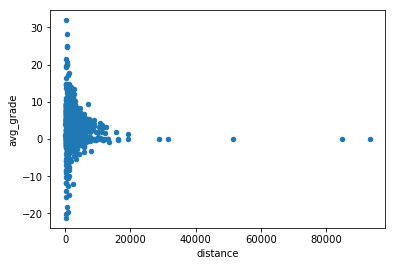

In [6]:
segment_data.plot.scatter(x='distance', y='avg_grade')

In [7]:
segment_data.describe()

,climb_category,avg_grade,elev_difference,distance,segment_id,KOM_s,KOMavg_s,QOM_s,QOMavg_s,avgRatio,Ratio
count,1339.000000,1339.000000,1339.000000,1339.000000,1.339000e+03,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,0.447349,3.159597,71.087155,2334.520015,4.590704e+06,255.792382,271.204406,328.894698,354.843739,1.340962,1.355909
std,0.749209,4.804865,80.100311,4412.257596,3.466517e+06,442.790842,457.281765,520.714702,550.661563,0.201043,0.615847
min,0.000000,-21.200000,0.000000,93.400000,2.575050e+05,4.000000,5.000000,5.000000,6.200000,0.910577,0.395722
25%,0.000000,0.000000,13.350000,703.800000,1.292550e+06,62.500000,66.900000,82.000000,89.700000,1.227345,1.196995
50%,0.000000,3.100000,41.300000,1358.300000,4.031689e+06,155.000000,164.800000,205.000000,225.200000,1.313785,1.290503
75%,1.000000,5.900000,101.100000,2711.400000,6.968905e+06,308.500000,327.900000,403.000000,427.500000,1.410547,1.408931
max,4.000000,31.900000,645.400000,93324.700000,1.370206e+07,9166.000000,9187.500000,10104.000000,10148.500000,4.737037,16.500000


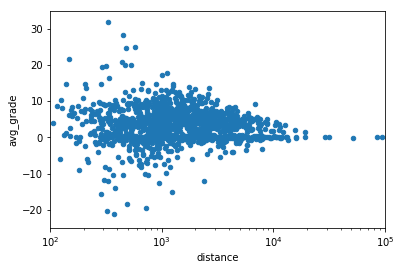

In [8]:
ax = segment_data.plot.scatter(x='distance', y='avg_grade')
ax.set_xscale("log", nonposx='clip')
ax.set_ylim(-25,35);
ax.set_xlim(100,100000);


In [9]:

segment_data.head()

,name,climb_category,climb_category_desc,avg_grade,elev_difference,distance,segment_id,KOM,KOMavg,QOM,QOMavg,KOM_s,KOMavg_s,QOM_s,QOMavg_s,avgRatio,Ratio
0,Segment,1.0,4,24.7,118.2,478.2,5432521,0 days 00:00:35,0 days 00:00:37,0 days 00:00:48,0 days 00:00:48.800000,35.0,37.0,48.0,48.8,1.318919,1.371429
1,Three Tunnel Dash,0.0,NC,3.7,7.1,193.6,4782364,0 days 00:00:14,0 days 00:00:14.400000,0 days 00:00:15,0 days 00:00:17.600000,14.0,14.4,15.0,17.6,1.222222,1.071429
2,Eagles Nest Slog,1.0,4,4.4,84.1,1842.7,1060760,0 days 00:03:40,0 days 00:03:48.200000,0 days 00:04:53,0 days 00:05:04,220.0,228.2,293.0,304.0,1.332165,1.331818
3,Up and away from Lands End,0.0,NC,4.2,17.8,427.9,11756862,0 days 00:00:32,0 days 00:00:34.400000,0 days 00:00:51,0 days 00:00:55.800000,32.0,34.4,51.0,55.8,1.622093,1.593750
4,Rosewall Hill,0.0,NC,3.9,76.5,1774.9,1077299,0 days 00:04:01,0 days 00:04:05,0 days 00:04:44,0 days 00:04:59.400000,241.0,245.0,284.0,299.4,1.222041,1.178423


## Grabbing extra data missed the first time around

It is simple enough to obtain the male and female leaderboards. However, there are two problems with simply taking the KOM and the QOM. Firstly, the fastest male time might have been set by a pro in a race or a drafting group. Secondly, the QOM could have been set by drafting with men. One way to address this is to take the average of the fastest times set on, say, 5 different dates. 

In [29]:
len(segment_data)

1364

In [30]:
def segmentTopN(segment_id = 30880724954, gender='M', N=5):
    # Return the fastest time and the average elapsed time for the quickest times set on N unique dates
    LB = Strava_Download.get_strava_leaderboard(top = 200, segment_id=segment_id,gender=gender)
    try:
        LB['Date'] = LB.start_date_local.dt.date
        return LB.elapsed_time[1], LB.groupby('Date').min().sort_values('rank', ascending=True)[:N].mean()['elapsed_time']
    except:
        return 0,0



In [101]:
def LBnriders(segment_id = 30880724954, gender='M'):
    # Return the fastest time and the average elapsed time for the quickest times set on N unique dates
    try:
        LB = client.get_segment_leaderboard(segment_id=segment_id, gender=gender, top_results_limit=10,page=1)
        return LB.entry_count
    except:
        return 0


In [104]:
#entryCounts = []

#for segment_id in segment_data.segment_id:
#    fRiders = LBnriders(segment_id, 'F')
#    mRiders = LBnriders(segment_id, 'M')
#    entryCounts += [[segment_id, fRiders, mRiders]]
#df = pd.DataFrame(entryCounts, columns = ['segment_id', 'fRiders', 'mRiders']); df.head()


,segment_id,fRiders,mRiders
0,5432521,683,4742
1,4782364,613,4203
2,1060760,399,3055
3,11756862,1200,8876
4,1077299,533,3710


Needed to stop warning messages before running the next cell

In [10]:
#segmentTimes = []

#for segment_id in segment_data.segment_id:
#    QOM, QOMavg = segmentTopN(segment_id, 'F', 5)
#    KOM, KOMavg = segmentTopN(segment_id, 'M', 5)
#    segmentTimes += [[segment_id, KOM, KOMavg,QOM, QOMavg ]]
#    print(segment_id)



In [105]:
segment_data = pd.merge(segment_data, df, on='segment_id', how='outer')
segment_data.head()


,name,climb_category,climb_category_desc,avg_grade,elev_difference,distance,segment_id,KOM,KOMavg,QOM,...,KOMavg_s,QOM_s,QOMavg_s,avgRatio,Ratio,athlete_count,start_latlng,end_latlng,fRiders,mRiders
0,Segment,1.0,4,24.7,118.2,478.2,5432521,0 days 00:00:35,0 days 00:00:37,0 days 00:00:48,...,37.0,48.0,48.8,1.318919,1.371429,5426,"(50.121014, -5.534)","(50.124452, -5.530033)",683,4742
1,Three Tunnel Dash,0.0,NC,3.7,7.1,193.6,4782364,0 days 00:00:14,0 days 00:00:14.400000,0 days 00:00:15,...,14.4,15.0,17.6,1.222222,1.071429,4816,"(50.125557, -5.527822)","(50.12448, -5.529887)",613,4203
2,Eagles Nest Slog,1.0,4,4.4,84.1,1842.7,1060760,0 days 00:03:40,0 days 00:03:48.200000,0 days 00:04:53,...,228.2,293.0,304.0,1.332165,1.331818,3454,"(50.190325, -5.567424)","(50.194661, -5.546019)",399,3055
3,Up and away from Lands End,0.0,NC,4.2,17.8,427.9,11756862,0 days 00:00:32,0 days 00:00:34.400000,0 days 00:00:51,...,34.4,51.0,55.8,1.622093,1.593750,10076,"(50.066153, -5.706905)","(50.066163, -5.700921)",1200,8876
4,Rosewall Hill,0.0,NC,3.9,76.5,1774.9,1077299,0 days 00:04:01,0 days 00:04:05,0 days 00:04:44,...,245.0,284.0,299.4,1.222041,1.178423,4243,"(50.20575000588689, -5.500071745238906)","(50.20169275564262, -5.522975269099717)",533,3710


In [106]:
segment_data.to_pickle('PopularSegmentsUK.pkl')

## Cleaning up the data

In [47]:
#segment_data = segment_data[segment_data.KOM!=0]

In [49]:
#len(segment_data)

1350

In [12]:
#segment_data['KOM s'] = segment_data.KOM / np.timedelta64(1,'s')
#segment_data['KOMavg s'] = segment_data.KOMavg / np.timedelta64(1,'s')
#segment_data['QOM s'] = segment_data.QOM / np.timedelta64(1,'s')
#segment_data['QOMavg s'] = segment_data.QOMavg / np.timedelta64(1,'s')

In [60]:
#segment_data['QT'] = [type(i) for i in segment_data.QOM]

In [76]:
#segment_data = segment_data[segment_data.QOM != 0]

In [77]:
#segment_data['QOM s'] = segment_data.QOM / np.timedelta64(1,'s')
#segment_data['QOMavg s'] = segment_data.QOMavg / np.timedelta64(1,'s')

In [95]:
#del segment_data['QT']

In [131]:
#segment_data.to_pickle('PopularSegmentsUK.pkl')

In [57]:
#aths = []
#for s in segment_data.segment_id:
#    ss = client.get_segment(s)
#    aths += [[ss.id, ss.athlete_count, ss.start_latlng, ss.end_latlng]]
#aths
#df = pd.DataFrame(aths, columns=['segment_id', 'athlete_count', 'start_latlng', 'end_latlng']);df.head()

,segment_id,athlete_count,start_latlng,end_latlng
0,5432521,5426,"(50.121014, -5.534)","(50.124452, -5.530033)"
1,4782364,4816,"(50.125557, -5.527822)","(50.12448, -5.529887)"
2,1060760,3454,"(50.190325, -5.567424)","(50.194661, -5.546019)"
3,11756862,10076,"(50.066153, -5.706905)","(50.066163, -5.700921)"
4,1077299,4243,"(50.20575000588689, -5.500071745238906)","(50.20169275564262, -5.522975269099717)"


In [59]:
#segment_data = pd.merge(segment_data, df, on='segment_id', how='outer');segment_data.head()

,name,climb_category,climb_category_desc,avg_grade,elev_difference,distance,segment_id,KOM,KOMavg,QOM,QOMavg,KOM_s,KOMavg_s,QOM_s,QOMavg_s,avgRatio,Ratio,athlete_count,start_latlng,end_latlng
0,Segment,1.0,4,24.7,118.2,478.2,5432521,0 days 00:00:35,0 days 00:00:37,0 days 00:00:48,0 days 00:00:48.800000,35.0,37.0,48.0,48.8,1.318919,1.371429,5426,"(50.121014, -5.534)","(50.124452, -5.530033)"
1,Three Tunnel Dash,0.0,NC,3.7,7.1,193.6,4782364,0 days 00:00:14,0 days 00:00:14.400000,0 days 00:00:15,0 days 00:00:17.600000,14.0,14.4,15.0,17.6,1.222222,1.071429,4816,"(50.125557, -5.527822)","(50.12448, -5.529887)"
2,Eagles Nest Slog,1.0,4,4.4,84.1,1842.7,1060760,0 days 00:03:40,0 days 00:03:48.200000,0 days 00:04:53,0 days 00:05:04,220.0,228.2,293.0,304.0,1.332165,1.331818,3454,"(50.190325, -5.567424)","(50.194661, -5.546019)"
3,Up and away from Lands End,0.0,NC,4.2,17.8,427.9,11756862,0 days 00:00:32,0 days 00:00:34.400000,0 days 00:00:51,0 days 00:00:55.800000,32.0,34.4,51.0,55.8,1.622093,1.593750,10076,"(50.066153, -5.706905)","(50.066163, -5.700921)"
4,Rosewall Hill,0.0,NC,3.9,76.5,1774.9,1077299,0 days 00:04:01,0 days 00:04:05,0 days 00:04:44,0 days 00:04:59.400000,241.0,245.0,284.0,299.4,1.222041,1.178423,4243,"(50.20575000588689, -5.500071745238906)","(50.20169275564262, -5.522975269099717)"


In [60]:
segment_data.to_pickle('PopularSegmentsUK.pkl')

## Working with the clean data set

In [151]:
segment_data = pd.read_pickle('PopularSegmentsUK.pkl')

In [152]:
segment_data.head()

,name,climb_category,climb_category_desc,avg_grade,elev_difference,distance,segment_id,KOM,KOMavg,QOM,...,KOMavg_s,QOM_s,QOMavg_s,avgRatio,Ratio,athlete_count,start_latlng,end_latlng,fRiders,mRiders
0,Segment,1.0,4,24.7,118.2,478.2,5432521,0 days 00:00:35,0 days 00:00:37,0 days 00:00:48,...,37.0,48.0,48.8,1.318919,1.371429,5425,"(50.121014, -5.534)","(50.124452, -5.530033)",683,4742
1,Three Tunnel Dash,0.0,NC,3.7,7.1,193.6,4782364,0 days 00:00:14,0 days 00:00:14.400000,0 days 00:00:15,...,14.4,15.0,17.6,1.222222,1.071429,4816,"(50.125557, -5.527822)","(50.12448, -5.529887)",613,4203
2,Eagles Nest Slog,1.0,4,4.4,84.1,1842.7,1060760,0 days 00:03:40,0 days 00:03:48.200000,0 days 00:04:53,...,228.2,293.0,304.0,1.332165,1.331818,3454,"(50.190325, -5.567424)","(50.194661, -5.546019)",399,3055
3,Up and away from Lands End,0.0,NC,4.2,17.8,427.9,11756862,0 days 00:00:32,0 days 00:00:34.400000,0 days 00:00:51,...,34.4,51.0,55.8,1.622093,1.593750,10076,"(50.066153, -5.706905)","(50.066163, -5.700921)",1200,8876
4,Rosewall Hill,0.0,NC,3.9,76.5,1774.9,1077299,0 days 00:04:01,0 days 00:04:05,0 days 00:04:44,...,245.0,284.0,299.4,1.222041,1.178423,4243,"(50.20575000588689, -5.500071745238906)","(50.20169275564262, -5.522975269099717)",533,3710


In [153]:
segment_data.describe()

,climb_category,avg_grade,elev_difference,distance,segment_id,KOM_s,KOMavg_s,QOM_s,QOMavg_s,avgRatio,Ratio,athlete_count,fRiders,mRiders
count,1339.000000,1339.000000,1339.000000,1339.000000,1.339000e+03,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,0.447349,3.159597,71.087155,2334.520015,4.590704e+06,255.792382,271.204406,328.894698,354.843739,1.340962,1.355909,4473.043316,499.876027,3973.167289
std,0.749209,4.804865,80.100311,4412.257596,3.466517e+06,442.790842,457.281765,520.714702,550.661563,0.201043,0.615847,5590.007253,733.121447,4890.721581
min,0.000000,-21.200000,0.000000,93.400000,2.575050e+05,4.000000,5.000000,5.000000,6.200000,0.910577,0.395722,39.000000,2.000000,34.000000
25%,0.000000,0.000000,13.350000,703.800000,1.292550e+06,62.500000,66.900000,82.000000,89.700000,1.227345,1.196995,1649.500000,161.500000,1498.000000
50%,0.000000,3.100000,41.300000,1358.300000,4.031689e+06,155.000000,164.800000,205.000000,225.200000,1.313785,1.290503,3172.000000,330.000000,2817.000000
75%,1.000000,5.900000,101.100000,2711.400000,6.968905e+06,308.500000,327.900000,403.000000,427.500000,1.410547,1.408931,5359.500000,613.000000,4751.500000
max,4.000000,31.900000,645.400000,93324.700000,1.370206e+07,9166.000000,9187.500000,10104.000000,10148.500000,4.737037,16.500000,93142.000000,13816.000000,79326.000000


The most popular segement in the data set

In [154]:
segment_data[segment_data.athlete_count == segment_data.athlete_count.max() ]

,name,climb_category,climb_category_desc,avg_grade,elev_difference,distance,segment_id,KOM,KOMavg,QOM,...,KOMavg_s,QOM_s,QOMavg_s,avgRatio,Ratio,athlete_count,start_latlng,end_latlng,fRiders,mRiders
279,Full Sawyers Uphill,0.0,NC,2.2,41.0,1799.7,3970089,0 days 00:02:23,0 days 00:02:26.400000,0 days 00:02:50,...,146.4,170.0,173.2,1.18306,1.188811,93142,"(51.45183, -0.268831)","(51.449423, -0.293531)",13816,79326


In [160]:
seg = segment_data.sort_values(['athlete_count'], ascending=False)[:1000]
seg.describe()

,climb_category,avg_grade,elev_difference,distance,segment_id,KOM_s,KOMavg_s,QOM_s,QOMavg_s,avgRatio,Ratio,athlete_count,fRiders,mRiders
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.426000,3.036300,66.911900,1958.322500,4.408498e+06,214.318000,226.351400,274.382000,293.043800,1.316447,1.318024,5667.35600,637.396000,5029.960000
std,0.732844,4.509635,78.218748,1937.396786,3.383121e+06,233.822163,244.445156,299.828904,317.321202,0.141849,0.324041,6011.51913,802.558372,5249.634327
min,0.000000,-18.400000,0.000000,105.100000,2.575050e+05,5.000000,5.000000,5.000000,6.200000,0.910577,0.459016,1666.00000,62.000000,1403.000000
25%,0.000000,-0.000000,12.575000,656.075000,1.210602e+06,57.000000,61.450000,75.000000,81.900000,1.217239,1.188483,2687.75000,287.000000,2413.250000
50%,0.000000,2.850000,36.150000,1297.150000,3.872938e+06,143.500000,151.700000,178.000000,193.000000,1.298414,1.277778,4119.00000,459.000000,3632.000000
75%,1.000000,5.800000,94.125000,2542.725000,6.691040e+06,281.000000,295.800000,357.000000,381.350000,1.385869,1.388889,6454.75000,709.750000,5731.750000
max,4.000000,31.900000,645.400000,13208.400000,1.333740e+07,2000.000000,2064.400000,2467.000000,2547.200000,2.334951,7.000000,93142.00000,13816.000000,79326.000000


In [162]:
seg.mRiders.sum()/seg.fRiders.sum()

7.891420718046552

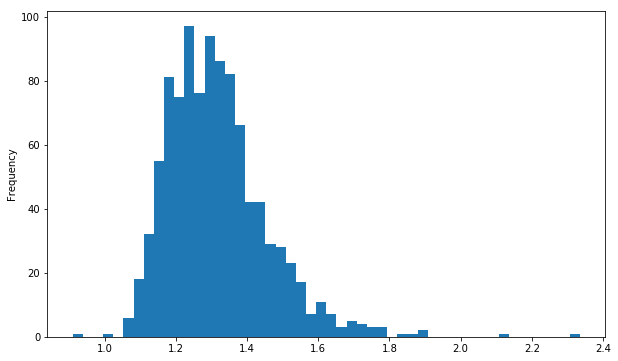

In [65]:
seg.avgRatio.plot(kind='hist', bins=50)

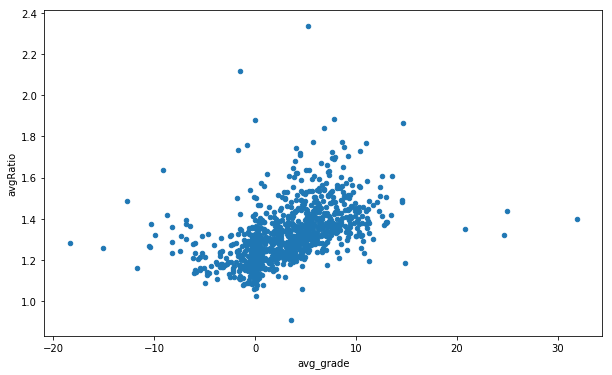

In [67]:
seg.plot.scatter('avg_grade','avgRatio')
#plt.ylim((0.9,2.0));

In [84]:
seg.avgRatio[seg.avg_grade>10].mean(), seg.avgRatio[(seg.avg_grade>-1) & (seg.avg_grade<1)].mean()

(1.4288377902876708, 1.2295753738376938)

In [216]:
seg.columns = ['name', 'climb_category', 'climb_category_desc', 'avg_grade',
       'elev_difference', 'distance', 'segment_id', 'KOM', 'KOMavg', 'QOM',
       'QOMavg', 'KOM_s', 'KOMavg_s', 'QOM_s', 'QOMavg_s', 'avgRatio',
       'Ratio']

In [217]:
import xgboost
import random, operator
xgb_parms = {'learning_rate': 0.1, 'subsample': 0.6, 
             'colsample_bylevel': 0.6, 'silent': True, 'objective': 'reg:linear'}

In [242]:
X = seg[ ['avg_grade','elev_difference', 'distance', 'segment_id', 'KOM_s']]
Y =  seg[ 'QOM_s']
all_vars = ['avg_grade','elev_difference', 'distance', 'segment_id', 'KOM_s']

In [228]:
xdata = xgboost.DMatrix(X, Y, feature_names=all_vars)


In [229]:
xgb_parms['seed'] = random.randint(0,1e9)
model = xgboost.train(xgb_parms, xdata)

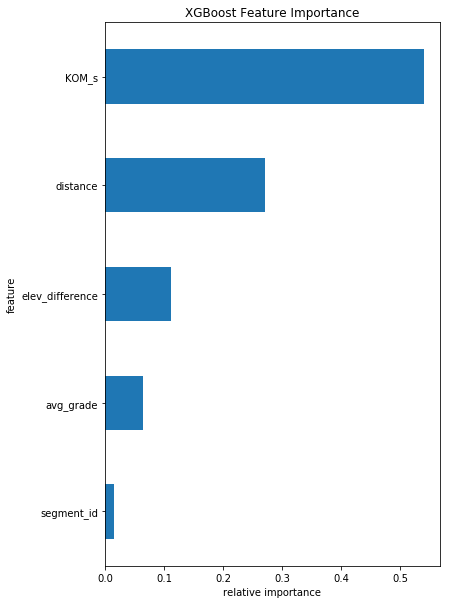

In [230]:
importance = model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance');

In [231]:
model.eval(xdata)

b'[0]\teval-rmse:1.706086'

In [232]:
predX = model.predict(xdata)

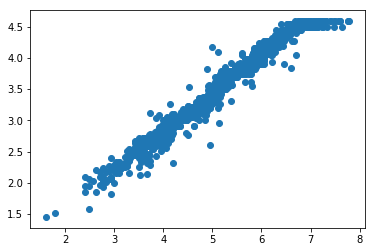

In [233]:
plt.scatter(Y,predX)

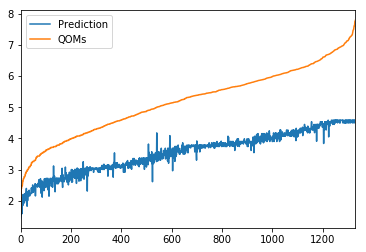

In [234]:
df = pd.DataFrame({'QOMs':Y.values, 'Prediction':predX}).sort_values(['QOMs'])
df.index = range(len(df))
df.plot()
#plt.plot(predX,c='r')
#plt.ylim((0,2000))
#plt.show()

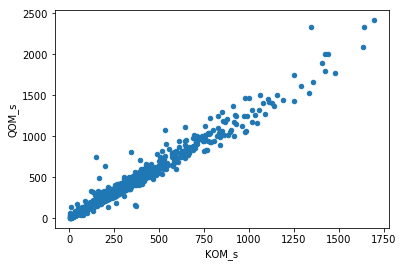

In [241]:
seg.plot.scatter(x='KOM_s', y='QOM_s')

In [245]:
from sklearn import linear_model
lrModel = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)


In [246]:
lrModel.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [248]:
predX = lrModel.predict(X)


{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

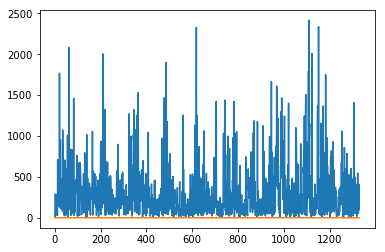

In [254]:
plt.plot(np.array([Y,predX]).T);

42.06222219197641
1382.2555153916178
0.9576453697056713


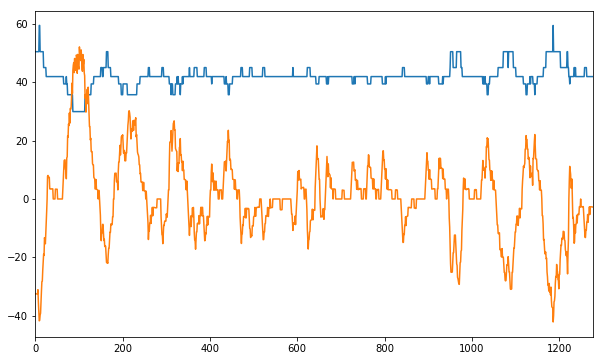

In [23]:
import BikeTimeAuto as bta

## Theoretical model


In [163]:
def QOMKOM(mr=72, pw=4.0, mrRel=1.2, pwRel=1.13, g=0):
    """
    mr is mass of male rider
    pw is power weight ratio of male rider
    rmRel is relative mass of male versus female rider
    pwRel is relative power to weight ratio
    g is grade of segment
    """
    a=bta.solveV(Power=mr*pw, Grade=g, mr=mr, Cd=0.5,  A=0.5, Br=0, Vw=0, Bw=90, Pressure=1020, Temp=15, DP=False, Humidity=False, Crr=0.00, Cxf=0.0, df=0.337*2, Cxr=0.0, dr=0.337*2, RS=0.25, mb=0, mfw=0, mrw=0, g=9.81, plotIt=False)
    b=bta.solveV(Power=mr*pw/pwRel, Grade=g, mr=mr, Cd=0.5,  A=0.5, Br=0, Vw=0, Bw=90, Pressure=1020, Temp=15, DP=False, Humidity=False, Crr=0.00, Cxf=0.0, df=0.337*2, Cxr=0.0, dr=0.337*2, RS=0.25, mb=0, mfw=0, mrw=0, g=9.81, plotIt=False)
    c=bta.solveV(Power=mr/mrRel*pw/pwRel, Grade=g, mr=mr/mrRel, Cd=0.5,  A=0.5, Br=0, Vw=0, Bw=90, Pressure=1020, Temp=15, DP=False, Humidity=False, Crr=0.00, Cxf=0.0, df=0.337*2, Cxr=0.0, dr=0.337*2, RS=0.25, mb=0, mfw=0, mrw=0, g=9.81, plotIt=False)
    d=bta.solveV(Power=mr/mrRel*pw/pwRel, Grade=g, mr=mr/mrRel, Cd=0.5,  A=0.5/mrRel**(1/3), Br=0, Vw=0, Bw=90, Pressure=1020, Temp=15, DP=False, Humidity=False, Crr=0.00, Cxf=0.0, df=0.337*2, Cxr=0.0, dr=0.337*2, RS=0.25, mb=0, mfw=0, mrw=0, g=9.81, plotIt=False)
    e=bta.solveV(Power=mr*pw, Grade=g, mr=mr, Cd=0.5,  A=0.5, Br=0, Vw=4, Bw=90, Pressure=1020, Temp=15, DP=False, Humidity=False, Crr=0.005, Cxf=0.0491, df=0.337*2, Cxr=0.0491, dr=0.337*2, RS=0.25, mb=8, mfw=1.264, mrw=1.364, g=9.81, plotIt=False)
    f=bta.solveV(Power=mr/mrRel*pw/pwRel, Grade=g, mr=mr/mrRel, Cd=0.5,  A=0.5/mrRel**(1/3), Br=0, Vw=4, Bw=90, Pressure=1020, Temp=15, DP=False, Humidity=False, Crr=0.005, Cxf=0.0491, df=0.337*2, Cxr=0.0491, dr=0.337*2, RS=0.25, mb=8, mfw=1.264, mrw=1.364, g=9.81, plotIt=False)
    print(mr, pw, mrRel, pwRel, g)
    print('Rider only ', a,b,c,d,(a/b),(a/c),(a/d))
    print('With bike etc ',(e/f))
    return e,f


First consider a steep hill, where the non bike ratio should be close to pwRel. Then include the bike, which ups the relative performance of men. Then consider a flat road with and without bike.

In [87]:
mr, pw, mrRel, pwRel, g = 72, 5.0, 1.2, 1.13, 0.3
QOMKOM(mr, pw, mrRel, pwRel, g)

mr, pw, mrRel, pwRel, g = 72, 5.0, 1.2, 1.13, 0.0
QOMKOM(mr, pw, mrRel, pwRel, g)



72 5.0 1.2 1.13 0.3
Rider only  1.76956518632 1.56678599171 1.5662085703 1.56641270701 1.12942367093 1.12984006082 1.12969281876
With bike etc  1.15873113063
72 5.0 1.2 1.13 0.0
Rider only  13.2899458514 12.7594042432 12.0070590999 12.2527779893 1.04158043731 1.1068443772 1.08464756834
With bike etc  1.0907457535


Now we modify pwRel to match Strava estimated value of 1.43

In [95]:
mr, pw, mrRel, pwRel, g = 72, 5.0, 1.2, 1.3, 0.3
QOMKOM(mr, pw, mrRel, pwRel, g)

mr, pw, mrRel, pwRel, g = 72, 5.0, 1.2, 1.3, 0.0
QOMKOM(mr, pw, mrRel, pwRel, g)



72 5.0 1.2 1.3 0.3
Rider only  1.76956518632 1.36251353303 1.36213317842 1.36226766902 1.29875053966 1.29911319565 1.29898494001
With bike etc  1.33260452428
72 5.0 1.2 1.3 0.0
Rider only  13.2899458514 12.1770501326 11.4590429003 11.6935468926 1.09139288306 1.15977799953 1.13651965255
With bike etc  1.1489578591


Fewer women - not comparing like with like, women not electing to make public, weather conditions

In [186]:
#mr, pw, mrRel, pwRel, g = 72, 5.0, 1.2, 1.13, 0.3
mr, pw, mrRel, pwRel, g = 72, 5.0, 1.2, 1.4, 0.3

modelRatio = []
for g in range(-20,30):
    m,f = QOMKOM(mr, pw, mrRel, pwRel, g/100)
    modelRatio += [[g, m/f]]
df2 = pd.DataFrame(modelRatio, columns=['Grade', 'Model_QOM/KOM'])


72 5.0 1.2 1.4 -0.2
Rider only  31.2769094771 30.9416120446 28.3196098136 29.1672562729 1.01083645648 1.1044258619 1.07232950485
With bike etc  1.06247877207
72 5.0 1.2 1.4 -0.19
Rider only  30.5999812693 30.2502136254 27.6917012289 28.5188314843 1.01156248508 1.1050235237 1.07297458124
With bike etc  1.0631509486
72 5.0 1.2 1.4 -0.18
Rider only  29.9057348024 29.5401598388 27.0470698857 27.8530604348 1.01237552422 1.10569222207 1.07369654665
With bike etc  1.06390705973
72 5.0 1.2 1.4 -0.17
Rider only  29.1933560405 28.8104554214 26.3848501493 27.1690358567 1.01329033552 1.10644388258 1.07450835556
With bike etc  1.06476201745
72 5.0 1.2 1.4 -0.16
Rider only  28.4619618465 28.0600035021 25.7040916318 26.4657603552 1.01432495703 1.10729304323 1.07542581299
With bike etc  1.06573421693
72 5.0 1.2 1.4 -0.15
Rider only  27.7105939003 27.2875923813 25.0037489732 25.7421352432 1.01550160648 1.10825756289 1.07646835192
With bike etc  1.06684655264
72 5.0 1.2 1.4 -0.14
Rider only  26.93821291

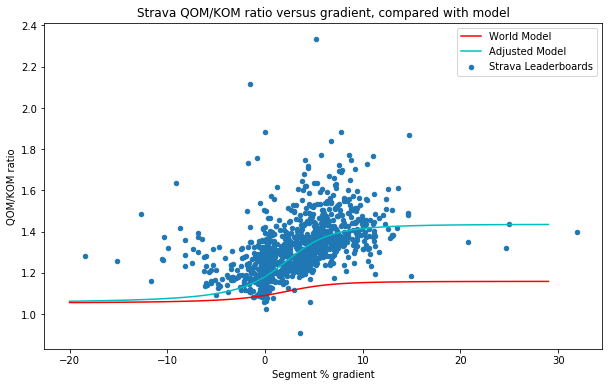

In [209]:
seg.plot.scatter('avg_grade','avgRatio')
plt.plot(df.Grade, df['Model_QOM/KOM'],c='r', label='World model')
plt.plot(df2.Grade, df2['Model_QOM/KOM'],c='c')
plt.title('Strava QOM/KOM ratio versus gradient, compared with model')
plt.legend(['World Model','Adjusted Model','Strava Leaderboards'])
plt.ylabel('QOM/KOM ratio')
plt.xlabel('Segment % gradient')
plt.show()

In [208]:
seg[(seg.avg_grade<3.5) & (seg.avg_grade>2.5) & (seg.distance>1700) & (seg.distance<2200)]

,name,climb_category,climb_category_desc,avg_grade,elev_difference,distance,segment_id,KOM,KOMavg,QOM,...,KOMavg_s,QOM_s,QOMavg_s,avgRatio,Ratio,athlete_count,start_latlng,end_latlng,fRiders,mRiders
13,Sandsifter to Hells Mouth Cafe,0.0,NC,2.7,64.9,1893.6,1033456,0 days 00:02:56,0 days 00:03:19.600000,0 days 00:04:14,...,199.6,254.0,267.4,1.339679,1.443182,3943,"(50.2289638277243, -5.384144905430851)","(50.23678073900739, -5.361623133922812)",462,3481
117,Mudford Climb,0.0,NC,3.1,60.6,1951.1,1742576,0 days 00:03:03,0 days 00:03:25.200000,0 days 00:03:41,...,205.2,221.0,253.4,1.234893,1.207650,3826,"(50.97552138380706, -2.6084301620721817)","(50.96029423177242, -2.621479695662856)",473,3353
804,DMRC Chaingang Ripley Hill Attack,0.0,NC,2.7,54.2,1984.1,1294271,0 days 00:03:08,0 days 00:03:10.400000,0 days 00:03:42,...,190.4,222.0,235.4,1.236345,1.180851,2466,"(53.031247, -1.4061)","(53.048633, -1.406668)",224,2242
638,Haughmond Hill - from Shrewsbury side,0.0,NC,3.1,54.0,1768.5,835475,0 days 00:02:47,0 days 00:03:05,0 days 00:03:43,...,185.0,223.0,233.6,1.262703,1.335329,1956,"(52.72659164853394, -2.701669279485941)","(52.73093364201486, -2.6769163459539413)",206,1750
